In [1]:
from __future__ import division
from utils import *
from functions import *
from numba import autojit
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)

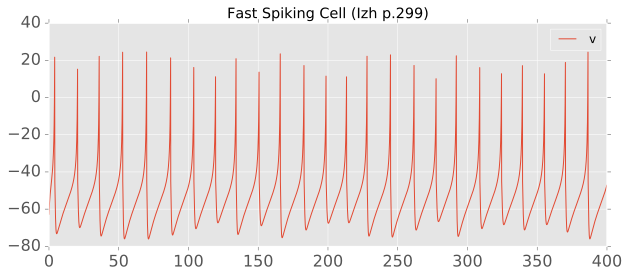

In [46]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 200
res_v = []
res_u = []
for i in t:
    v += dt/20 * ( (v+55)*(v+40) - u + I)
    u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
    if v>25: 
        v = -45
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('Fast Spiking Cell (Izh p.299)')
# plt.plot(t, res_u, label = 'u')
plt.legend()

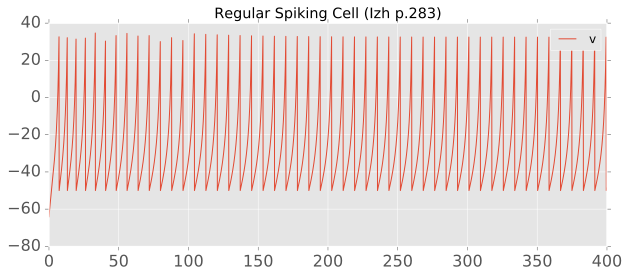

In [80]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 800
res_v = []
res_u = []
for i in t:
    v += dt/100 * (0.7* (v+60)*(v+40) - u + I)
    u += dt * 0.03 * ( -2 * (v +60) - u)
    if v>35: 
        v = -50
        u += 100
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('Regular Spiking Cell (Izh p.283)')

# plt.plot(t, res_u, label = 'u')
plt.legend()

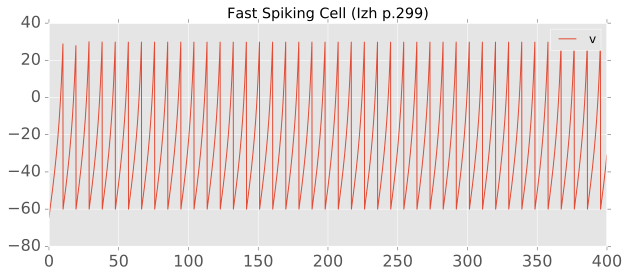

In [45]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 200
res_v = []
res_u = []
for i in t:
    v += dt/100 * ( 0.7*(4+60) - u + I)
    u += dt * 0.1 * ( 0.2 * v - u)
    if v>30: 
        v = -60
        u += 2 
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('Fast Spiking Cell (Izh p.299)')
# plt.plot(t, res_u, label = 'u')
plt.legend()

In [ ]:
for i,s in enumerate([100,200,300]):
    ax = fig.add_subplot(231+i) 
    res_v = []
    res_u = []
    I = s
    c= 0
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + I)
        u += dt * 0.03 * ( 0.025 * (v +55)**3*(v>-55) - u)
        if v>25-0.1*u: 
            v = -45
            c+=1
        res_v.append(v)
        res_u.append(u)

    ax.plot(t, res_v, label='v')
    ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Fast Spiking Cell : %g Hz'%float(1000*c/T))
    # plt.plot(t, res_u, label = 'u')

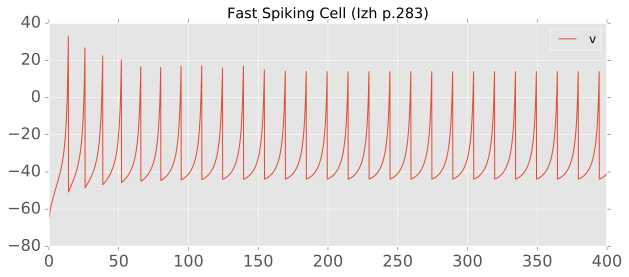

In [66]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 300
res_v = []
res_u = []
for i in t:
    v += dt/100 * ((v+56)*(v+42) - u + I)
    u += dt * 0.03 * ( 8 * (v +56) - u)
    if v>40-0.1*u: 
        v = -53 + 0.04*u
        u = min(u+20,670)
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('LTS (Izh p.283)')

# plt.plot(t, res_u, label = 'u')
plt.legend()

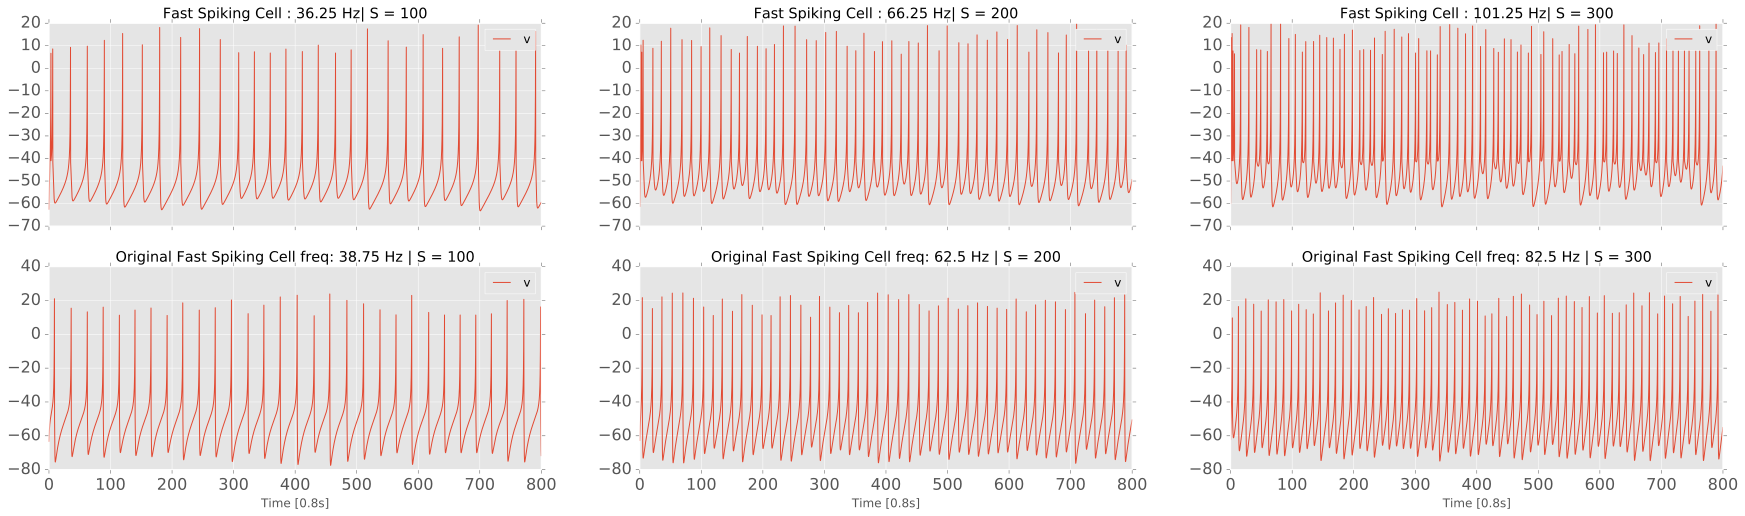

In [171]:
T = 800
dt = 0.1
t = np.arange(0,T,dt)
v = -65

fig = plt.figure(figsize=(30,8))

for i,s in enumerate([100,200,300]):
    ax = fig.add_subplot(231+i) 
    res_v = []
    res_u = []
    I = s
    c= 0
    u=0
    v = -65
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + 2.5*I)
        u += dt * 0.037 * ( 0.05 * (v+55)**3*(v>-55) - u)
        if v>20: 
            v = -41
            c+=1
            u +=-20
        res_v.append(v)
        res_u.append(u)
    ax.set_xticklabels([])
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Fast Spiking Cell : %g Hz| S = %d'%(float(1000*c/T),s))
    # plt.plot(t, res_u, label = 'u')

for i,s in enumerate([100,200,300]):
    ax = fig.add_subplot(234+i) 
    res_v = []
    res_u = []
    c = 0
    I = s
    u=0
    v = -65
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + I)
        u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
        if v>25:
            c += 1
            v = -45
        res_v.append(v)
        res_u.append(u)
    ax.set_xlabel('Time [0.8s]')
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Original Fast Spiking Cell freq: %g Hz | S = %d'%(float(1000*c/T),s))


plt.savefig(DIRECTORY + 'neuron_models.pdf')


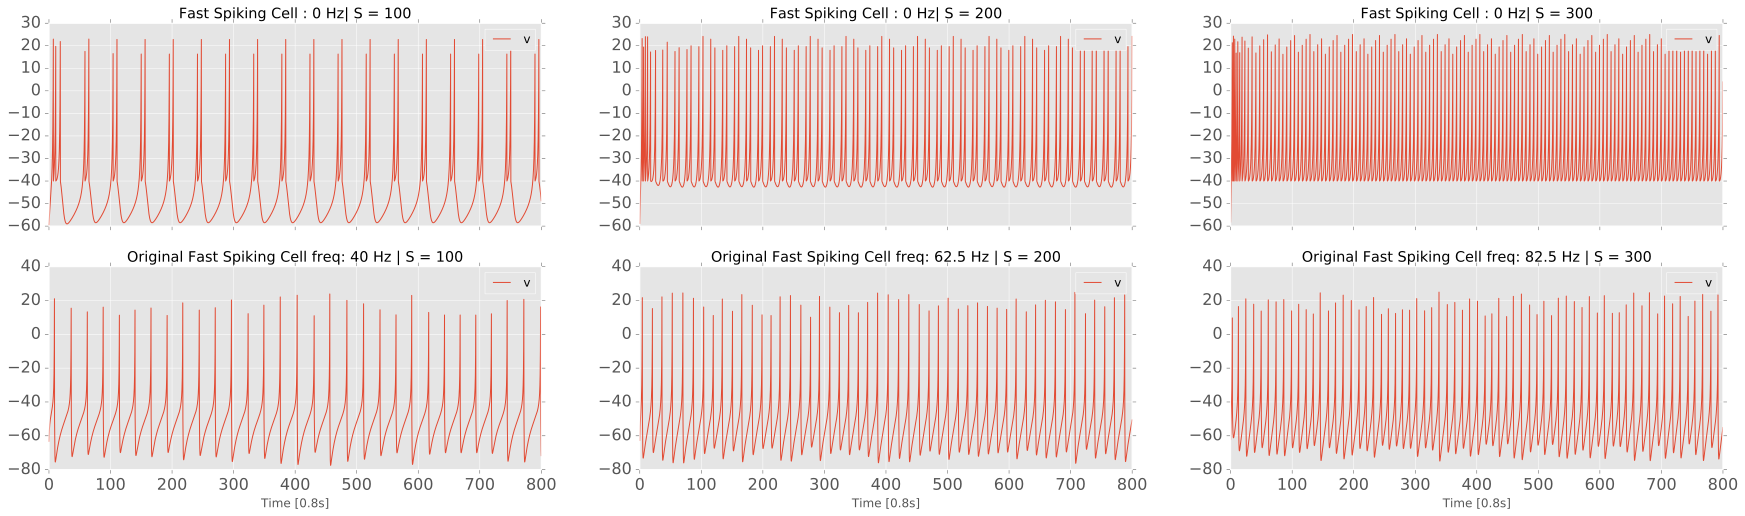

In [97]:
T = 800
dt = 0.1
t = np.arange(0,T,dt)
v = -65

fig = plt.figure(figsize=(30,8))
S = [100,200,300]
for i,s in enumerate(S):
    ax = fig.add_subplot(231+i) 
    res_v = []
    res_u = []
    I = s
    c= 0
    u=0
#     v = -65
#     for i in t:
#         v += dt/20 * ( (v+55)*(v+40) - u + I)
#         u += dt * 0.08 * ( 0.02 * (v+55)**3*(v>-55) - u)
#         if v>0: 
#             v = -45

#             if i>T/2:
#                 c+=1
#         res_v.append(v)
#         res_u.append(u)
    v = -60
    for i in t:
        v += dt/50 * ( (v+60)*(v+40) - u + 3*I)
        u += dt * 0.03 * ( (v +55) - u)
        if v>25:
            v = -40
            u += 150
        res_v.append(v)
        res_u.append(u)
    ax.set_xticklabels([])
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Fast Spiking Cell : %g Hz| S = %d'%(float(1000*c/T*2),s))
    # plt.plot(t, res_u, label = 'u')

for i,s in enumerate(S):
    ax = fig.add_subplot(234+i) 
    res_v = []
    res_u = []
    c = 0
    I = s
    u=0
    v = -65
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + I)
        u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
        if v>25:
            if i > T/2:
                c += 1
            v = -45
        res_v.append(v)
        res_u.append(u)
    ax.set_xlabel('Time [0.8s]')
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Original Fast Spiking Cell freq: %g Hz | S = %d'%(float(1000*c/T*2),s))


plt.savefig(DIRECTORY + 'neuron_models_3_01.pdf')

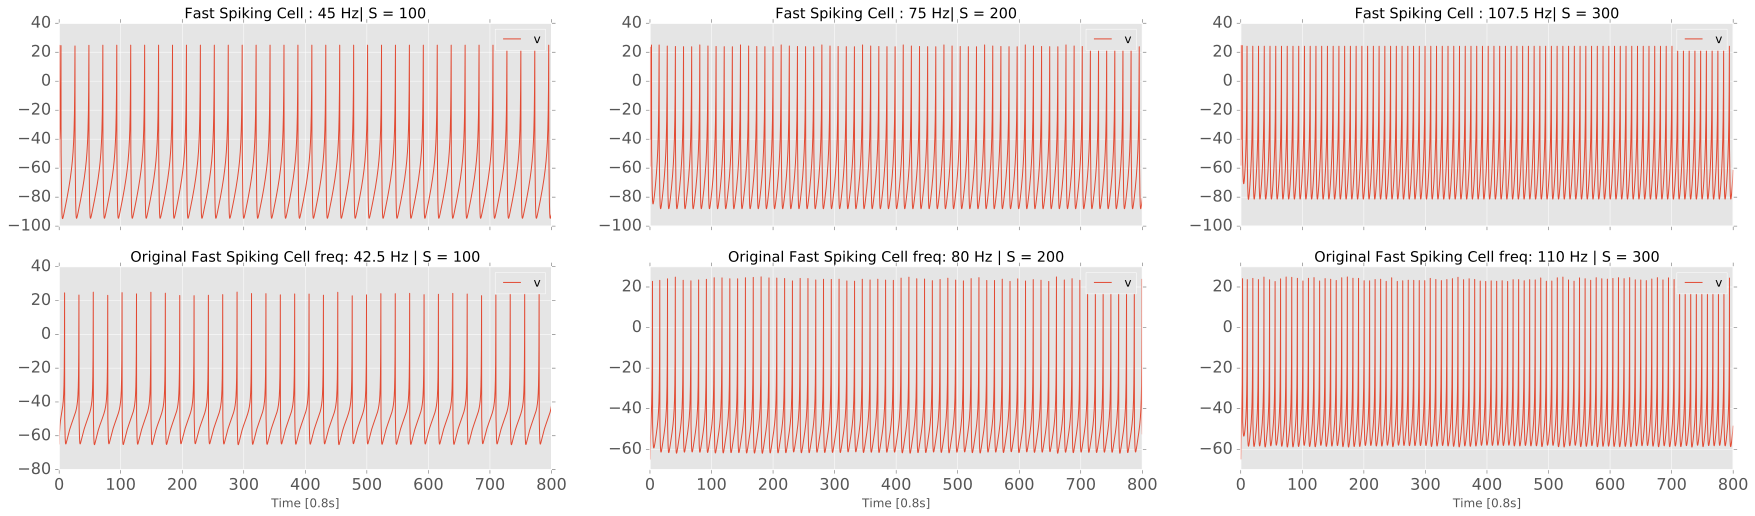

In [261]:
T = 800
dt = 0.01
t = np.arange(0,T,dt)
v = -65

fig = plt.figure(figsize=(30,8))
S = [100,200,300]
for i,s in enumerate(S):
    ax = fig.add_subplot(231+i) 
    res_v = []
    res_u = []
    I = s
    c= 0
    u=0
#     v = -65
#     for i in t:
#         v += dt/20 * ( (v+55)*(v+40) - u + I)
#         u += dt * 0.08 * ( 0.02 * (v+55)**3*(v>-55) - u)
#         if v>0: 
#             v = -45

#             if i>T/2:
#                 c+=1
#         res_v.append(v)
#         res_u.append(u)
#     v = -60
#     for i in t:
#         v += dt/50 * ( (v+60)*(v+40) - 20*u + 30*I)
#         u += dt * 0.03 * ( (v +55) - u)
#         if v>25:
#             v = -40
#             u += 150
#             if i>T/2:
#                 c+=1
    v = -60
    for i in t:
        v += dt/50 * ( (v+60)*(v+40) - 20*u + 35*I)
        u += dt * 0.03 * ( (v +55) - u)
        if v>25:
            v = -40
            u += 150
            if i>T/2:
                c+=1
        res_v.append(v)
        res_u.append(u)
    ax.set_xticklabels([])
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Fast Spiking Cell : %g Hz| S = %d'%(float(1000*c/T*2),s))
    # plt.plot(t, res_u, label = 'u')

for i,s in enumerate(S):
    ax = fig.add_subplot(234+i) 
    res_v = []
    res_u = []
    c = 0
    I = s
    u=0
    v = -65
    for i in t:
        v += dt/20 * ( (v+55)*(v+40) - u + I)
        u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
        if v>25:
            if i > T/2:
                c += 1
            v = -45
        res_v.append(v)
        res_u.append(u)
    ax.set_xlabel('Time [0.8s]')
    ax.plot(t, res_v, label='v')
#     ax.plot(t, res_u, label='u')
    ax.legend()
    ax.set_title('Original Fast Spiking Cell freq: %g Hz | S = %d'%(float(1000*c/T*2),s))


plt.savefig(DIRECTORY + 'neuron_models_3_001.pdf')

In [30]:
T = 1000
dt = 0.1
t = np.arange(0,T,dt)
v = -65

# fig = plt.figure(figsize=(30,8))
S = [100,200,300]
# for i,s in enumerate(S):
#     ax = fig.add_subplot(231+i) 
#     res_v = []
#     res_u = []
#     I = s
#     c= 0
#     u=0
#     v = -65
#     for i in t:
#         v += dt/20 * ( (v+55)*(v+40) - u + I)
#         u += dt * 0.08 * ( 0.02 * (v+55)**3*(v>-55) - u)
#         if v>0: 
#             v = -45

#             if i>T/2:
#                 c+=1
#         res_v.append(v)
#         res_u.append(u)
#     ax.set_xticklabels([])
#     ax.plot(t, res_v, label='v')
# #     ax.plot(t, res_u, label='u')
#     ax.legend()
#     ax.set_title('Fast Spiking Cell : %g Hz| S = %d'%(float(1000*c/T*2),s))
#     # plt.plot(t, res_u, label = 'u')

# for i,s in enumerate(S):
#     ax = fig.add_subplot(234+i) 
#     res_v = []
#     res_u = []
#     c = 0
#     I = s
#     u=0
#     v = -65
#     for i in t:
#         v += dt/20 * ( (v+55)*(v+40) - u + I)
#         u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
#         if v>25:
#             if i > T/2:
#                 c += 1
#             v = -45
#         res_v.append(v)
#         res_u.append(u)
#     ax.set_xlabel('Time [0.8s]')
#     ax.plot(t, res_v, label='v')
# #     ax.plot(t, res_u, label='u')
#     ax.legend()
#     ax.set_title('Original Fast Spiking Cell freq: %g Hz | S = %d'%(float(1000*c/T*2),s))

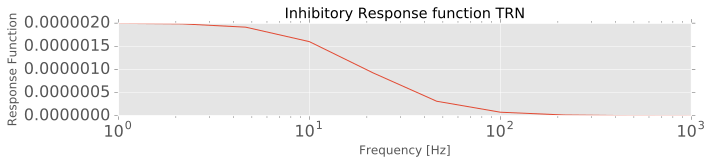

In [15]:
'''
SINGLE NEURON FREQUENCY RESPONSE
'''
T = 4000
dt = 0.1
t = np.arange(0,T,dt)
F = np.logspace(0,3,10)

@autojit
def resonance(F, model = 'cc'):
    res_var = np.empty(len(F), dtype=np.float64)
    b = 2
    for k,f in enumerate(F):
        A = 0.1
        I = A*np.cos(2*np.pi*f*t/1000)
        res_v = []
        res_u = []
        u=0
        if model == 'izh':
            v = -65
            for i in range(len(t)):
                v += dt/20 * ( (v+55)*(v+40) - 20000*u + 30*I[i])
                u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
                if v>25:
                    v = -45
                if i*dt>1500:
                    res_v.append(v/A)
        elif model == 'cc-izh':
            v = -60
            for i in range(len(t)):
                v += dt/50 * ( (v+60)*(v+40) - 20*u + 30*I[i])
                u += dt * 0.03 * ( (v +55) - u)
                if v>25:
                    v = -40
                    u += 150
                if i*dt>1500:
                    res_v.append(v/A)
        elif model == 'cc-tchu': 
            v = -65
            u = 0
            for i in range(len(t)):
                v += dt/100 * ( -v + -20*u + 30*I[i] );     
                u += dt/20 * ( -u + 4.5*v );
                if i*dt>1500:
                    res_v.append(v)
        elif model == 'TRN':
            v = -60
            for i in range(len(t)):
                v += dt/40 * ( 0.25*(v**2 + 110*v +45*65) - 2000*u + 0.01*I[i])
                u += dt * 0.015 * (b* (v +65) - u)
                if v>0:
                    v = -55
                    u += 50
                b = 10 * (v<-70) + 2*(v>=70)
                if i*dt>1500:
                    res_v.append(v/A)
        else:
            v = -65
            for i in range(len(t)):
                v += dt/20 * ( (v+55)*(v+40) - 200*u + 30*I[i])
                u += dt * 0.08 * ( 0.02 * (v+55)**3*(v>-55) - u)
                if v>0.1: 
                    v = -45
                if i*dt>1500:
                    res_v.append(v/A)
            
        var = np.var(res_v)
#         var = np.max(res_v)-np.min(res_v)
        res_var[k] = var
    return res_var
# models = ['TRN','cc-izh', 'izh', 'mod1', 'cc-tchu']
models = ['TRN']
# models = ['cc-tchu']
c = 0
fig = plt.figure(figsize=(10,10))
for model in models:
    c+=1
    ax = fig.add_subplot(510+c)
    ax.semilogx(F, resonance(F, model))
    ax.set_title('Inhibitory Response function '+model)
    ax.set_ylabel('Response Function')
    ax.set_xlabel('Frequency [Hz]')
plt.tight_layout()
plt.savefig(DIRECTORY + model +'_.pdf')

In [ ]:
'''
NETWORK FREQUENCY RESPONSE
'''
T = 4000
dt = 0.1
t = np.arange(0,T,dt)
F = np.logspace(0,3,100)

@autojit
def resonance(F, model = 'cc'):
    res_var = np.empty(len(F), dtype=np.float64)
    for k,f in enumerate(F):
        A = 0.1
        I = A*np.cos(2*np.pi*f*t/1000)
        res_v = []
        res_u = []
        u=0
        if model == 'izh':
            v = -65
            for i in range(len(t)):
                v += dt/20 * ( (v+55)*(v+40) - u + I[i])
                u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
                if v>25:
                    v = -45
                if i*dt>1500:
                    res_v.append(v/A)
        elif model == 'cc-izh':
            v = -60
            for i in range(len(t)):
                v += dt/50 * ( (v+60)*(v+40) - u + I[i])
                u += dt * 0.03 * ( (v +55) - u)
                if v>25:
                    v = -40
                    u += 150
                if i*dt>1500:
                    res_v.append(v/A)
        elif model == 'cc-tchu': 
            v = -65
            u = 0
            beta_ad = 0 
            alpha_w = -20
            f=10
            c_m = 100
            for i in range(len(t)):
                v += dt/100 * ( -v - 20*u + I[i] );     
                u += dt/20 * ( -u + 4.5*v );
                if i*dt>1500:
                    res_v.append(v)
        else:
            v = -65
            for i in range(len(t)):
                v += dt/20 * ( (v+55)*(v+40) - u + I[i])
                u += dt * 0.08 * ( 0.02 * (v+55)**3*(v>-55) - u)
                if v>0.1: 
                    v = -45
                if i*dt>1500:
                    res_v.append(v/A)
            
        var = np.var(res_v)
#         var = np.max(res_v)-np.min(res_v)
        res_var[k] = var
    return res_var
models = ['cc-izh', 'izh', 'mod1', 'cc-tchu']
# models = ['cc-tchu']
c = 0
fig = plt.figure(figsize=(10,10))
for model in models:
    c+=1
    ax = fig.add_subplot(410+c)
    ax.semilogx(F, resonance(F, model))
    ax.set_title('Inhibitory Response function '+model)
    ax.set_ylabel('Response Function')
    ax.set_xlabel('Frequency [Hz]')
plt.tight_layout()
plt.savefig(DIRECTORY + model +'.pdf')

0.126213639833


/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


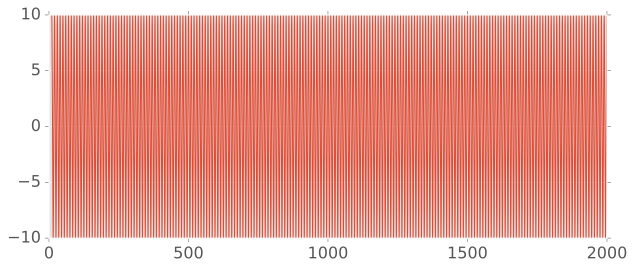

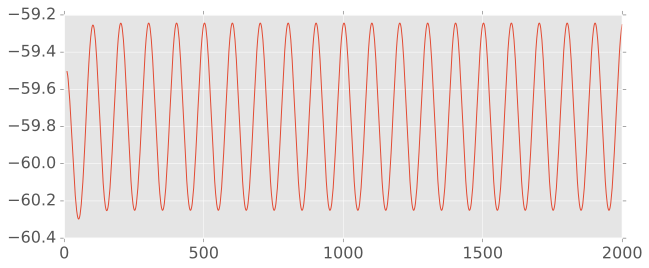

In [93]:
T = 4000
dt = 0.1
t = np.arange(0,T,dt)
v = -65

# plt.plot(t,I)
res_var = []
F = [100]
for f in F:
    I = 10*np.cos(2*np.pi*f*t/1000)
    res_v = []
    res_u = []
    c = 0
    u=0
#     v = -65
#     for i in t:
#         v += dt/20 * ( (v+55)*(v+40) - u + I[i])
#         u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
#         if v>25:
#             v = -45
#         res_v.append(v)
    v = -60
    for i in t:
        v += dt/50 * ( (v+60)*(v+40) - u + I[i])
        u += dt * 0.03 * ( (v +55) - u)
        if v>25:
            v = -40
            u += 150
        res_v.append(v)
    var = np.var(res_v[100:])
    res_var.append(var)

    
plt.plot(t[100:],I[100:])
plt.figure()
plt.plot(t[100:],res_v[100:])
print(var)

In [163]:
vtE = 10;             
vtI = 4;              
tau_vI = 10;          
tau_vE = 40;          
tau_ad = 20;              
TsigI = 10;               
TsigE = 12;               
tau_I = 10;               
beta_adE = 0;             
beta_adI = 4.5;           
alpha_adI = -2;           
alpha_adE = 0;            
GammaII = 15;             
GammaIE = -10;            
GammaEE = 15;             
GammaEI =15;              
TEmean = 0.5*vtE;         


N = 5000;                  
NE = int(0.8*N);                
NI = int(0.2*N);                
dt = 0.01;                 
T = 600/dt;                


Delta_T = 0.5;             
refrac = 5/dt;             
ref= refrac*np.zeros(N);    
gamma_c =0.9;         
TImean = 1*vtI;

g_m = 1;                            
Gama_c = g_m*gamma_c/(1-gamma_c);
c_mI = tau_vI*(g_m+Gama_c);         
alpha_wI = alpha_adI*(g_m+Gama_c);  
c_mE = tau_vE*g_m;
alpha_wE = alpha_adE*g_m;
NEmean = TEmean*g_m;
NImean = TImean*(g_m+Gama_c);       
NEsig = TsigE*g_m;
NIsig = TsigI*(g_m+Gama_c);         
Vgap = Gama_c/NI;                   
WII = GammaII*c_mI/NI/dt;           
WEE = GammaEE*c_mE/NE/dt;           
WEI = GammaEI*c_mI/NE/dt;           
WIE = GammaIE*c_mE/NI/dt;           


v = 0*np.ones(N);
c_m = np.zeros(N);
c_m[:NE] = c_mE;
c_m[NE:] = c_mI;
alpha_w = np.zeros(N);
alpha_w[:NE] = alpha_wE;
alpha_w[NE:] = alpha_wI;
vt = np.zeros(N);
vt[:NE] = vtE;
vt[NE:] = vtI;
beta_ad = np.zeros(N);
beta_ad[:NE] = beta_adE;
beta_ad[NE:] = beta_adI;
vm1 = 0*np.ones(N);
ad = 0*np.ones(N);
vv = np.zeros(N);
Iback = np.zeros(N);
Im_sp = 0;
Igap = np.zeros(N);
Ichem = np.zeros(N);
Ieff = np.zeros(N);

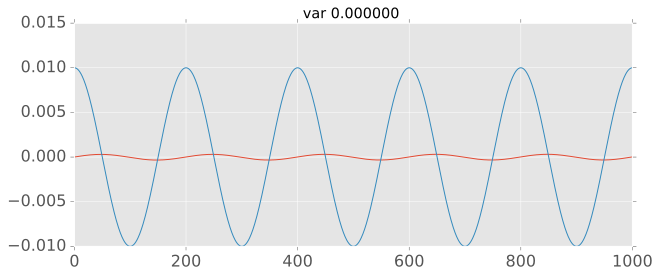

In [241]:
T = 20000
dt = 0.1
t = np.arange(0,T,dt)
v = -65
v = -65
ad = 0
beta_ad = 0 
alpha_w = -20
f=50
c_m = 100
I = 0.01*np.cos(2*np.pi*f*t/1000)
res_v = []
for i in range(len(t)):
    v= v+ dt/c_m*(-g_m*v +alpha_w*ad +I[i]);     
    ad = ad + dt/tau_ad*(-ad+beta_ad*v);
    if i*dt>1500:
        res_v.append(v)
    
plt.plot(res_v[0:1000])
plt.plot(I[0:1000])
plt.title( 'var %f '% np.var(res_v))

In [230]:
print(fourier(np.array(res_v)))

[200.17293558149589, -52.422254368023857]


/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


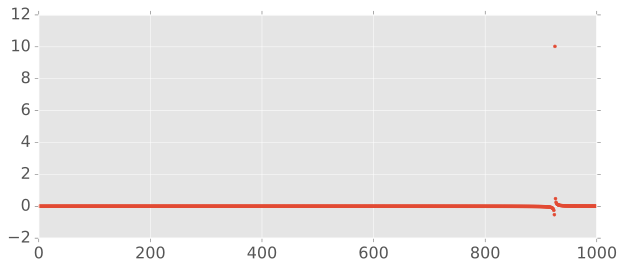

In [232]:
plt.plot(np.fft.fft(res_v)[0:1000], '.')